# Simple Linear Regression

### **Analyze mpg data from seaborn's dataset**
    - Horsepower as independent variable
    - mpg as dependent variable

### - Analyze the relationship
### - Apply Simple Linear Regression
### - Perform F-test and T-test
### - Interpret the result
### - Use α 5%  (α = 0.05)


In [58]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## The data concerns city-cycle fuel consumption in miles per gallon.

In [59]:
df = sns.load_dataset('mpg')
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [61]:
# drop missing value
df = df.dropna().reset_index()
df

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
 9   name          392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB


In [63]:
df[['mpg', 'horsepower']].describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


# **Relationship (Correlation)**

In [64]:
# Correlation: mpg vs horsepower
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


## Interpretasi

Apa arti korelasi -0.77?

- Bernilai negatif, itu berarti hubungannya berbanding terbalik. Semakin besar horsepower, maka semakin kecil nilai mpg.
- Nilai -0.77 termasuk ke dalam strong correlation.

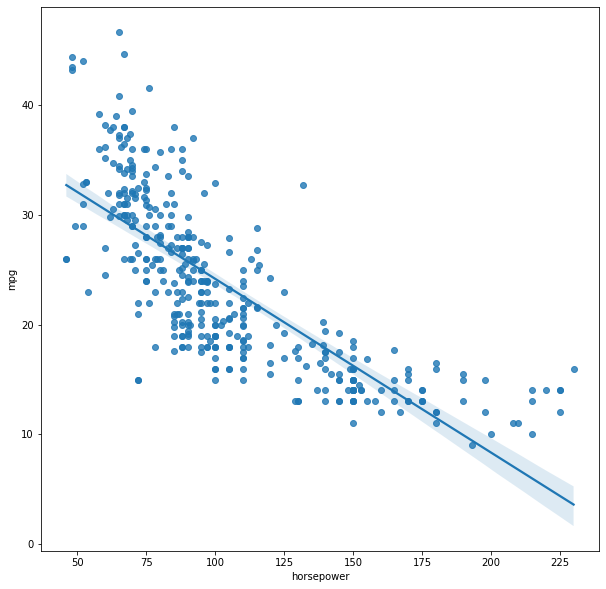

In [65]:
# Regression Plot
plt.figure(figsize=(10,10))
sns.regplot(x = 'horsepower', y = 'mpg', data = df);

# **Simple Linear Regression**

Untuk mengaplikasikan simple linear regression pada dataset sesuai dengan instruksi soal, berarti:

- X: horsepower<br>
- y: mpg

In [66]:
# feature
X = df[['horsepower']]

# target
y = df['mpg']

In [67]:
# ditambahkan constant
sm_lm = sm.OLS(df['mpg'], sm.add_constant(df[['horsepower']]))

# Fitting (model belajar dari training set)
result = sm_lm.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        14:46:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# **Interpretasi**

### **R-square** 

* Nilai R-squared sebesar 0.606, artinya model simple linear regression yang dengan hanya menggunakan 'horsepower' sebagai fiturnya, dapat menjelaskan sekitar 60.6% variasi dari nilai mpg.


### **F-test** 
* Nilai F-test statistic digunakan untuk melihat apakah ada pengaruh signifikan antara mpg dengan (semua feature, dalam kasus ini hanya) horsepower. Apakah horsepower itu memengaruhi nilai mpg?
<br><br>

* H0: horsepower tidak berpengaruh signifikan terhadap mpg
* H1: horsepower berpengaruh signifikan terhadap mpg
<br><br>

* Karena nilai Prob (F-statistic) nya < 0.05, yaitu 7.03e-81 --> pvalue<0.05, maka dapat dikatakan bahwa kita menolak null hypotesis. Dengan kata lain, berdasarkan uji statistik, ada cukup bukti kalau horsepower itu memengaruhi nilai mpg.
<br><br>

### **t-test** 

- B0: coeff. constants
- B1: coeff. horsepower

- B0 P value = 0.000 ---> P value < 0.05, reject Ho, artinya intercept dibutuhkan dalam model ini.<br>
- B1 P value = 0.000 ---> P value < 0.05, reject Ho, artinya horsepower berpengaruh secara signifikan terhadap mpg (secara negatif, lihat nilai coeff horsepowernya negatif --> Semakin tinggi horse power maka cenderung semakin rendah mpg). <br>


### **Interpretasi Coeff** 

y = 39.93 + -0.1578 x

* Coeff constant adalah nilai intercept (39.93) <br>
y = B0 + B1X, y dengan X=0, artinya adalah niali mpg ketika horsepowernya 0 (tapi dalam kasus ini dapat diabaikan, karena tidak ada mobil dalam kondisi normal dengan horsepower 0).<br><br>

* Coeff horsepower = -0.1578 <br>
Ini berarti untuk tiap kenaikan 1 horsepower, nilai mpg akan berkurang sebanyak 0.1578.<br><br>




# **Melihat nilai hasil prediksi dari model**

In [69]:
X

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
387,86.0
388,52.0
389,84.0
390,79.0


In [70]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [71]:
# Nilai mpg actual
y_true = y.to_frame()
y_true 


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [72]:
# Nilai mpg hasil prediksi
y_predict = result.predict()
y_predict

array([19.41604569, 13.89148002, 16.25915102, 16.25915102, 17.83759835,
        8.68260382,  5.21001968,  5.99924335,  4.42079602,  9.94536168,
       13.10225635, 14.68070368, 16.25915102,  4.42079602, 24.94061135,
       24.94061135, 24.62492189, 26.51905869, 26.04552449, 32.67500329,
       26.20336922, 25.72983502, 24.94061135, 22.09940615, 25.72983502,
        5.99924335,  8.36691435,  6.78846702,  9.47182748, 26.04552449,
       25.72983502, 24.94061135, 24.15138769, 23.36216402, 24.15138769,
       26.04552449, 24.15138769, 13.89148002, 12.31303268, 15.78561682,
       16.25915102, 11.52380902, 13.10225635, 12.31303268, 22.57294035,
       28.57104022, 24.15138769, 26.04552449, 26.36121395, 25.72983502,
       28.88672969, 27.93966129, 29.67595335, 29.04457442, 30.46517702,
       28.88672969, 24.94061135, 27.30828235, 31.41224542, 25.72983502,
       26.36121395, 13.89148002, 12.31303268, 16.25915102, 15.78561682,
       16.25915102,  7.10415648, 15.46992735, 14.68070368,  9.94

In [73]:
# Nilai mpg hasil prediksi
y_predict = result.predict()

yhat = pd.DataFrame(data=y_predict, columns=['prediction'])
yhat

,prediction
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
387,26.361214
388,31.727935
389,26.676903
390,27.466127


In [74]:
df['mpg_pred'] = yhat
df

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_pred
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.416046
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,13.891480
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.259151
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.259151
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,17.837598
...,...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,26.361214
388,394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,31.727935
389,395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,26.676903
390,396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,27.466127


In [75]:
df[['horsepower','mpg','mpg_pred']]

,horsepower,mpg,mpg_pred
0,130.0,18.0,19.416046
1,165.0,15.0,13.891480
2,150.0,18.0,16.259151
3,150.0,16.0,16.259151
4,140.0,17.0,17.837598
...,...,...,...
387,86.0,27.0,26.361214
388,52.0,44.0,31.727935
389,84.0,32.0,26.676903
390,79.0,28.0,27.466127


In [79]:
# y_merged = [y_true, yhat]

# pd.concat(y_merged, axis=1, join='inner')

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

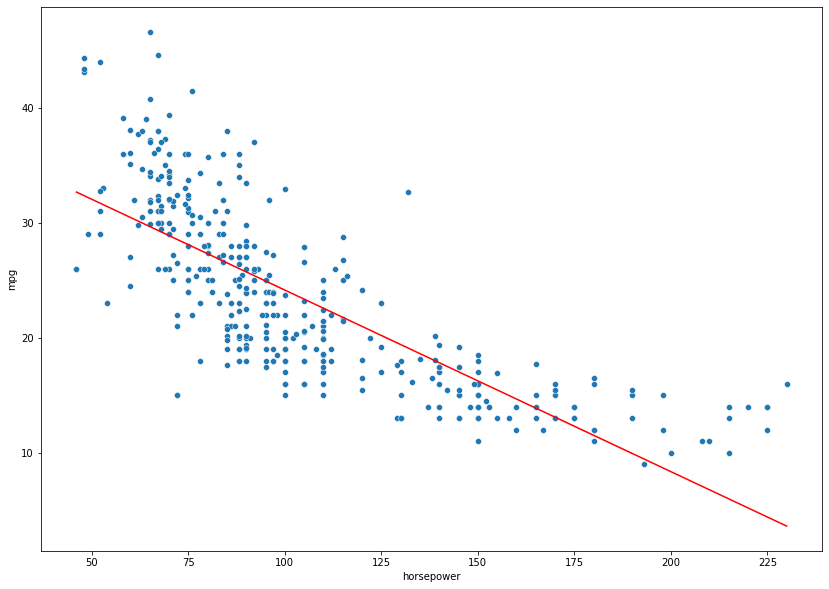

In [84]:
plt.figure(figsize=(14,10))

# titik biru: nilai mpg actual
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df)

# garis merah: fungsi regresi (nilai prediksi mpg)
sns.lineplot(x = 'horsepower', y = 'mpg_pred', data = df, color='red')


Garis merah adalah model linear regresi dengan fungsi --> y = 39.93 + -0.1578 x


## **Cek nilai RMSE model (cost function)**

In [78]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_true, yhat)
rmse

# satuan RMSE mengacu pada satuan variabel y (dalam kasus ini mpg)

array([4.89322623])